<a href="https://colab.research.google.com/github/EshithaReddy/biomedical/blob/main/hsaLoeweZip.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[  0.           0.           0.         ... -65.44310971 -63.19183183
 -58.68647218]
Hill(E0=1.00, Emax=0.00, h=1.00, C=1.00e-01)
[0.001      0.0026827  0.00719686 0.01930698 0.05179475 0.13894955
 0.37275937 1.        ]


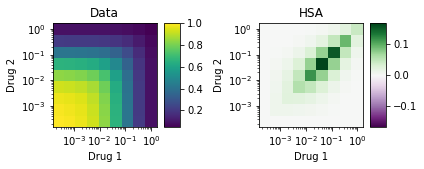

In [7]:
pip install synergy
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from synergy.utils import sham
from synergy.single import Hill
from synergy.combination import HSA
from synergy.utils import plots

#uploading dataset
url = 'copied_raw_github_link'
data = pd.read_csv("https://raw.githubusercontent.com/EshithaReddy/biomedical/main/synergy.csv")

#reading data
d1 = data['conc_r']
d2 = data['conc_c']
E = data['inhibition']
hsa = HSA()
#d1 = np.asarray([0,1,1], dtype=np.float64)
#d2 = np.asarray([1,0,1], dtype=np.float64)
#E = np.asarray([0.5, 0.4, 0.1])
synergy = hsa.fit(d1, d2, E)
print(synergy)


E0 = 1
Emax = 0
h = 1.
C = 1e-1
drug = Hill(E0=E0, Emax=Emax, h=h, C=C)
npoints=8
d = np.logspace(-3,0,num=npoints)
d1, d2, E = sham(d, drug)


synergy = hsa.fit(d1, d2, E)

fig = plt.figure(figsize=(6,3))

ax = fig.add_subplot(121)
plots.plot_heatmap(d1, d2, E, ax=ax, title="Data", cmap="viridis")

ax = fig.add_subplot(122)
hsa.plot_heatmap(ax=ax, title="HSA", center_on_zero=True)

plt.tight_layout()
plt.show()

/usr/local/lib/python3.6/dist-packages/synergy/single/hill.py:133: RuntimeWarning:

overflow encountered in power

/usr/local/lib/python3.6/dist-packages/synergy/single/hill.py:134: RuntimeWarning:

overflow encountered in power



Hill(E0=1.00, Emax=0.00, h=1.00, C=1.39e-02) Hill(E0=1.00, Emax=0.01, h=1.00, C=1.67e-02)


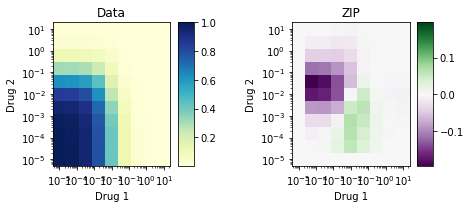

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

from synergy.combination import ZIP
from synergy.combination import MuSyC
from synergy.single import Hill

from synergy.utils import plots
from synergy.utils.dose_tools import grid
from synergy.utils.data_exchange import to_synergyfinder

#uploading dataset
url = 'copied_raw_github_link'
data = pd.read_csv("https://raw.githubusercontent.com/EshithaReddy/biomedical/main/synergy.csv")

#reading data
d1 = data['conc_r']
d2 = data['conc_c']
E = data['inhibition']

E0, E1, E2, E3 = 1., 0., 0., 0.
h1, h2 = 1., 1.
C1, C2 = 1e-2, 1e-1
alpha12, alpha21 = 10., 1.
gamma12, gamma21 = 1, 1

musyc = MuSyC(E0=E0, E1=E1, E2=E2, E3=E3, h1=h1, h2=h2, C1=C1, C2=C2, alpha12=alpha12, alpha21=alpha21, gamma12=gamma12, gamma21=gamma21)

npoints1 = 8
npoints2 = 10
D1, D2 = grid(1e-4, 10, 1e-4, 10,npoints1, npoints2, include_zero=True)

E = musyc.E(D1, D2)


# Build ZIP model
model = ZIP()

#Efit = E*(1+(np.random.rand(len(D1))-0.5)/10.)
Efit = E
"""
# Output data to test in synergyfinder R package
df = to_synergyfinder(D1, D2, Efit*100)
df.to_csv("synergyfinder_comparison/zip_test_data.csv", index=None)
"""
synergy = model.fit(D1, D2, Efit, use_jacobian=True)

print(model.drug1_model, model.drug2_model)

fig = plt.figure(figsize=(7,3))

ax=fig.add_subplot(121)
musyc.plot_heatmap(D1, D2, ax=ax, title="Data")

ax=fig.add_subplot(122)
model.plot_heatmap(ax=ax, title="ZIP")

plt.tight_layout()
plt.show()

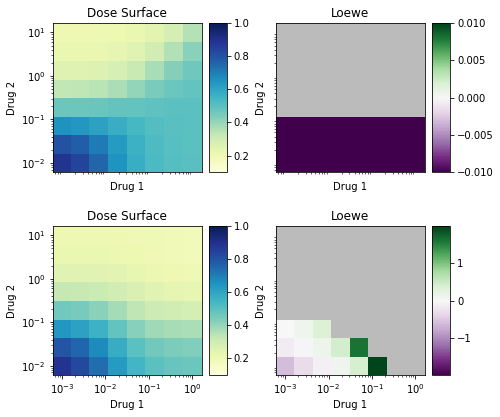

In [ ]:
  
import numpy as np
from synergy.single import Hill
from synergy.combination import MuSyC
from synergy.combination import Loewe
from synergy.utils.dose_tools import grid

from matplotlib import pyplot as plt

#uploading dataset
url = 'copied_raw_github_link'
data = pd.read_csv("https://raw.githubusercontent.com/EshithaReddy/biomedical/main/synergy.csv")

#reading data
d1 = data['conc_r']
d2 = data['conc_c']
E = data['inhibition']

E0, E1, E2, E3 = 1, 0.5, 0.2, 0.1
h1, h2 = 1., 1.
C1, C2 = 1e-2, 1e-1
alpha12, alpha21 = 0., 0.

gamma12, gamma21 = 1., 1.

model = MuSyC(E0=E0, E1=E1, E2=E2, E3=E3, h1=h1, h2=h2, C1=C1, C2=C2, alpha12=alpha12, alpha21=alpha21, gamma12=gamma12, gamma21=gamma21)

model2 = MuSyC(E0=E0, E1=E1, E2=E2, E3=E3*1.5, h1=h1, h2=h2, C1=C1, C2=C2, alpha12=1, alpha21=alpha21*2, gamma12=gamma12, gamma21=gamma21)

drug1 = Hill(E0=E0, Emax=E1, h=h1, C=C1)
drug2 = Hill(E0=E0, Emax=E2, h=h2, C=C2)

npoints = 8

D1, D2 = grid(1e-3, 1, 1e-2, 10, npoints, npoints)

E = model.E(D1, D2)
E_2 = model2.E(D1, D2)

loewe = Loewe()
loewe2 = Loewe()

loewe.fit(D1, D2, E, drug1_model=drug1, drug2_model=drug2)
loewe2.fit(D1, D2, E_2, drug1_model=drug1, drug2_model=drug2)

fig = plt.figure(figsize=(7,6))

ax = fig.add_subplot(2,2,1)
model.plot_heatmap(D1, D2, ax=ax, title="Dose Surface", vmin=E3, vmax=E0)
ax.set_xticks([])

ax = fig.add_subplot(2,2,2)
loewe.plot_heatmap(ax=ax, title="Loewe", vmin=-0.01, vmax=0.01, neglog=True)
ax.set_xticks([])
ax.set_yticks([])

ax = fig.add_subplot(2,2,3)
model2.plot_heatmap(D1, D2, ax=ax, title="Dose Surface", vmin=E3, vmax=E0)

ax = fig.add_subplot(2,2,4)
loewe2.plot_heatmap(ax=ax, title="Loewe", center_on_zero=True, neglog=True)
ax.set_yticks([])

plt.tight_layout()
plt.show()